Found 4706 images belonging to 5 classes.
Found 471 images belonging to 5 classes.


c:\Users\Maheen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6014 - loss: 1.1562

c:\Users\Maheen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.6024 - loss: 1.1535 - val_accuracy: 0.8599 - val_loss: 0.4100
Epoch 2/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.8839 - loss: 0.3439 - val_accuracy: 0.8896 - val_loss: 0.3204
Epoch 3/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9136 - loss: 0.2523 - val_accuracy: 0.8960 - val_loss: 0.2864
Epoch 4/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9204 - loss: 0.2283 - val_accuracy: 0.9002 - val_loss: 0.2506
Epoch 5/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9281 - loss: 0.2125 - val_accuracy: 0.9130 - val_loss: 0.2328


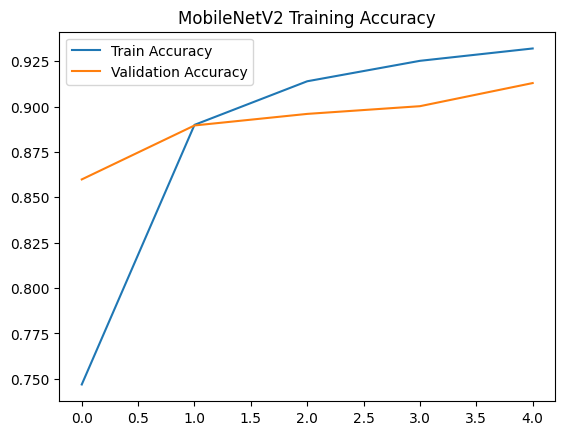

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

train_dir = "C:/Users/Maheen/Desktop/Processed Image/Train"
test_dir = "C:/Users/Maheen/Desktop/Processed Image/Test"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model.trainable = False  


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=5, validation_data=test_data)

model.save("rose_disease_mobilenetv2.h5")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("MobileNetV2 Training Accuracy")
plt.show()


In [4]:
pip install gradio tensorflow numpy pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from PIL import Image


model = tf.keras.models.load_model(r"C:\\Users\\Maheen\\Desktop\\rose disease detection model\\rose_disease_mobilenetv2.h5")

medicine_df = pd.read_csv(r"C:\\Users\\Maheen\\Downloads\\rose_disease_medicine.csv")

class_labels = ["Black Spot", "Downy Mildew", "Healthy Leaf", "Insect Hole", "Yellow Mosaic Virus"]

def predict_disease(img):
   
    img = img.resize((224, 224)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    disease = class_labels[class_index]
    
    treatment = medicine_df[medicine_df["Disease Name"] == disease].iloc[0]
    chemical = treatment["Chemical Treatment"]
    organic = treatment["Organic Alternative"]
    dosage = treatment["Dosage & Application"]
    medicine_image_path = treatment["Medicine Image"] 
    
    
    try:
        medicine_image = Image.open(medicine_image_path)  
    except:
        medicine_image = None  
    
   
    text_output = (
        f"**Disease:** {disease}\n\n"
        f"**Chemical Treatment:** {chemical}\n\n"
        f"**Organic Alternative:** {organic}\n\n"
        f"**Dosage and Application:** {dosage}"
    )
    
    return text_output, medicine_image


demo = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Markdown(),  
        gr.Image(type="pil")  
    ],
    title="🌹 Rose Disease Detection & Treatment",
    description="Upload an image of a rose leaf to detect disease and get recommended treatments. The medicine image will be displayed beside its name."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
print(f"Medicine image path: {'C:/Users/Maheen/Downloads/img.webp'}")


Medicine image path: C:/Users/Maheen/Downloads/img.webp


In [8]:
import os

dataset_path = "C:/Users/Maheen/Desktop/Processed Image/Train"
classes = ["Black Spot", "Downy mildew", "Healthy Leaf", "Insect Hole", "Yellow Mosaic Virus"]

for cls in classes:
    path = os.path.join(dataset_path, cls)
    print(f"{cls}: {len(os.listdir(path))} images")


Black Spot: 409 images
Downy mildew: 1478 images
Healthy Leaf: 1686 images
Insect Hole: 453 images
Yellow Mosaic Virus: 680 images
